# Behavioural Cloning Model

Plan:

1. Set up training and test sets
    - X: center image. Possibly also speed, left and right images, brake.
    - y: Steering angle
2. Normalise input data (center image)
    - Opt: Should we CV it like we did in the lane lines project?
3. Build basic Keras model.
    - Continuous output?
    - Reference traffic sign classifier model.
4. Set up evaluation of Keras model.
5. Train the model for 5 epochs and see what results we get
6. Improve on model.


### Imports

In [2]:
import pickle
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [132]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

In [139]:
from sklearn.model_selection import train_test_split

### Read in data

In [1]:
driving_info = "data/driving_log.csv"

In [8]:
## Import data
# Added header row manually to CSV.
driving_csv = pd.read_csv("data/driving_log.csv")

In [17]:
# Examine data
print("Number of datapoints: %d" % len(driving_csv))

driving_csv.head()

Number of datapoints: 2621


,Centre Image,Left Image,Right Image,Steering Angle,Throttle,Brake,Speed
0,/Users/jessica/Downloads/behavioural-cloning/I...,/Users/jessica/Downloads/behavioural-cloning/...,/Users/jessica/Downloads/behavioural-cloning/...,0.0,0.0,0,0.419201
1,/Users/jessica/Downloads/behavioural-cloning/I...,/Users/jessica/Downloads/behavioural-cloning/...,/Users/jessica/Downloads/behavioural-cloning/...,0.0,0.0,0,0.414994
2,/Users/jessica/Downloads/behavioural-cloning/I...,/Users/jessica/Downloads/behavioural-cloning/...,/Users/jessica/Downloads/behavioural-cloning/...,0.0,0.0,0,0.410002
3,/Users/jessica/Downloads/behavioural-cloning/I...,/Users/jessica/Downloads/behavioural-cloning/...,/Users/jessica/Downloads/behavioural-cloning/...,0.0,0.0,0,0.405888
4,/Users/jessica/Downloads/behavioural-cloning/I...,/Users/jessica/Downloads/behavioural-cloning/...,/Users/jessica/Downloads/behavioural-cloning/...,0.0,0.0,0,0.001089


In [124]:
# Extract centre image and steering angle from table
# Format: X_path: centre image name, y: steeringa angle
X_path = [driving_csv.loc[i]["Centre Image"] \
              for i in range(len(driving_csv))]
y = [driving_csv.loc[i][" Steering Angle"] \
              for i in range(len(driving_csv))]

In [125]:
# Import images
# Note: Redirected X_path to this directory because previously 
# saved in a different directory
X_images = [mpimg.imread(image_path) for image_path in X_path]

Images: 2621
Sample image


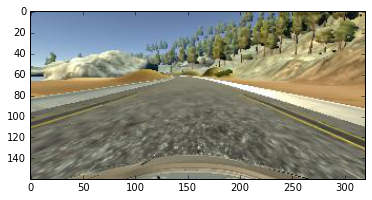

In [49]:
# View image
print("Images: %d" % len(X_images))
print("Sample image")
plt.imshow(X_images[0])
# X_images[0]

In [115]:
X_images[0].shape

(160, 320, 3)

### Train test split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.2, random_state=42)

In [158]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Keras model

In [151]:
# Convolutional model

model = Sequential()
model.add(Convolution2D(160, 3, 3, border_mode='same',
                        input_shape=(160,320,3)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [162]:
# Let's train the model using SGD + momentum:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

In [137]:
batch_size = 100
nb_epoch = 10
data_augmentation = True

In [150]:
X_train[0]

160

In [163]:
model.fit(X_train, y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 2096 samples, validate on 525 samples
Epoch 1/10
 500/2096 [======>.......................] - ETA: 3494s - loss: 0.0426 - acc: 0.6960

KeyboardInterrupt: 

### Network I copied from my keras traffic classifier notebook

### Process images lane-lines style

Abandoned because we need to ask the car to drive in the simulator in real time, so we can't really train on an ultra-processed version of the image and expect it to generalise to the unprocessed version in real time.